In [29]:
# Li's Project
# Adding the W-boson and b-quark channels to P-ONE

In [30]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
import math
import pandas as pd
import csv
from matplotlib.lines import Line2D
from matplotlib import rc


In [31]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [32]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))
projection_ice = pickle.load(open('../data/background_ice.pkl','rb'))
projection_pone = pickle.load(open('../data/background_pone_unsm.pkl','rb'))
shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']

In [33]:
e_grid_mceq = surface_fluxe[0][0]

In [34]:
dm2nu = DM2Nu()

In [35]:
m_grid = [100, 1e3, 1e4, 1e5]

In [36]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)

In [37]:
nu_e

,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
0,5,-8.90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,5,-8.85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,5,-8.80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,5,-8.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,5,-8.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,100000,-0.20,0.144074,0.000692,0.072383,0.524696,0.715321,0.620008,0.110050,0.145143,...,0.145251,0.000286,0.044073,0.095100,0.102653,0.225569,0.032903,0.0,0.326558,0.017237
11094,100000,-0.15,0.185505,0.000531,0.093018,0.382060,0.521692,0.451876,0.077593,0.102191,...,0.142884,0.000113,0.042088,0.087957,0.223359,0.208894,0.022130,0.0,0.199903,0.007814
11095,100000,-0.10,0.270209,0.000359,0.135284,0.233641,0.319224,0.276432,0.046798,0.061354,...,0.140611,0.000044,0.039676,0.080761,1.364648,0.227602,0.013008,0.0,0.109475,0.003194
11096,100000,-0.05,0.516782,0.000177,0.258479,0.118539,0.162355,0.140447,0.023600,0.031029,...,0.128199,0.000018,0.032712,0.065415,5.571369,0.361184,0.005999,0.0,0.052107,0.001164


In [38]:
m_5 = nu_e[nu_e['mDM'] == 5]

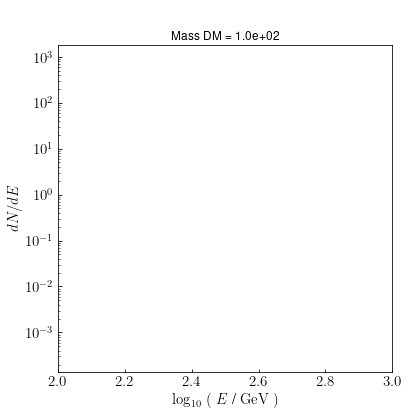

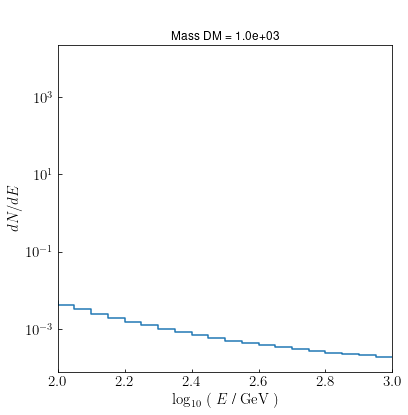

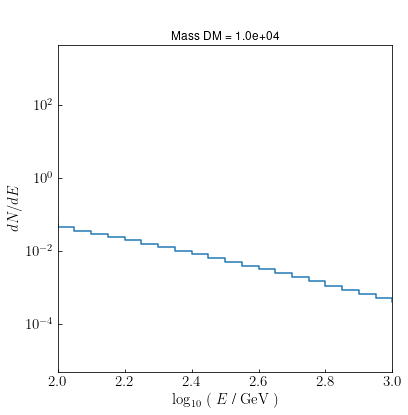

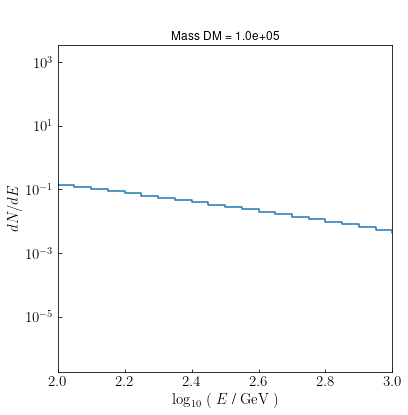

In [39]:
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdlogE = nu_e[nu_e['mDM'] == m]['W']
    figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    ax1.set_title('Mass DM = %.1e' % (m))
    ax1.step(np.log10(e_grid), dNdlogE / e_grid)

    ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax1.set_xlabel(r'$\log_{10}$ $($ $E$ / $\textrm{GeV}$ $)$ ', fontsize=fontsize)
    ax1.set_ylabel(r'$ dN/dE$', fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    ax1.set_xlim(2, 3)
    #ax1.set_ylim(1e-10,1e-5)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    #figure.savefig(PICS + "Final_flux"+".png",
    #               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [40]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)
phi_nue = []
phi_dm2nu = []
phi_burkert = []
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdlogE = nu_e[nu_e['mDM'] == m]['b']
    dNdlogE_mc = UnivariateSpline(e_grid, dNdlogE, k=1, s=0)(e_grid_mceq)
    phi_nue.append((dm2nu._dphi_dE_g_ch(5.62e-23, 2, m, e_grid, 2.3*1e23)) * np.array(dNdlogE) / np.array(e_grid))
    phi_dm2nu.append((dm2nu.dphide_channel(e_grid_mceq, m, 5.62e-23)))
    phi_burkert.append((dm2nu._dphi_de_c_burkert(e_grid_mceq, m, 5.62e-23)))

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:355: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:354: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


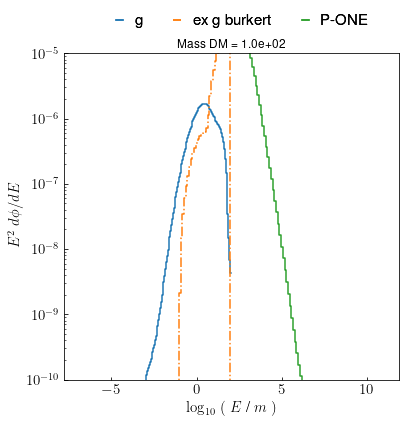

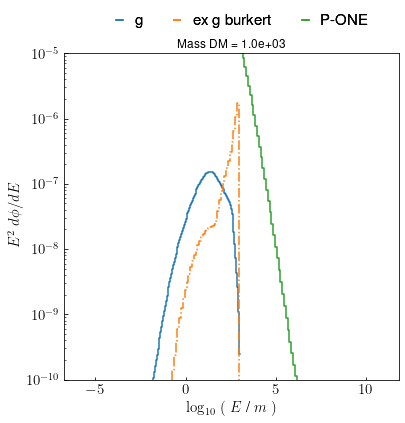

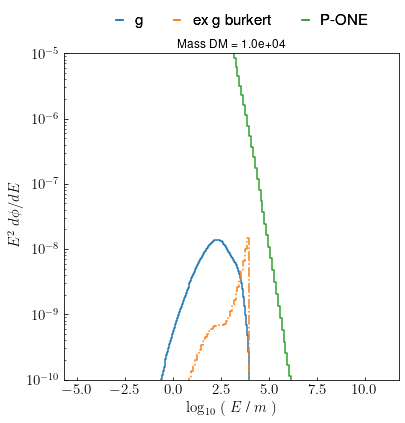

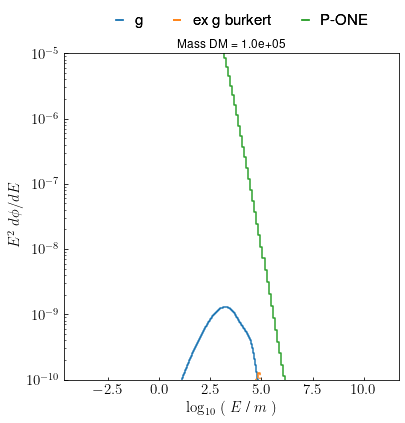

In [41]:
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdE = nu_e[nu_e['mDM'] == m]['b']
    figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    ax1.set_title('Mass DM = %.1e' % (m))
    ax1.step( np.log10(e_grid), (phi_nue[i]) * e_grid**2, label=r"g")
    # ax1.step( np.log10(e_grid_mceq), abs(phi_dm2nu[i]) * e_grid_mceq**2, label=r'ex g')
    ax1.step(np.log10(e_grid_mceq), (phi_burkert[i]/m) * e_grid_mceq**2, "-.", label=r'ex g burkert')
    ax1.step(np.log10(e_grid_mceq) , shower_po * e_grid_mceq**2, label=r'P-ONE')
    ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax1.set_xlabel(r'$\log_{10}$ $($ $E$ / $m$ $)$ ', fontsize=fontsize)
    ax1.set_ylabel(r'$E^2$ $d\phi / dE $', fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    #ax1.set_xlim(1, 7)
    ax1.set_ylim(1e-10,1e-5)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                     ncol=3, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    #figure.savefig(PICS + "Final_flux"+".png",
    #               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [42]:
(phi_nue[3])

array([3.02903442e-10, 3.12251117e-10, 3.22872732e-10, 3.33557223e-10,
       3.43499630e-10, 3.52294760e-10, 3.59693513e-10, 3.65294834e-10,
       3.68893100e-10, 3.70395431e-10, 3.69847238e-10, 3.67205924e-10,
       3.62494945e-10, 3.55944161e-10, 3.47371831e-10, 3.37465705e-10,
       3.26310454e-10, 3.14088658e-10, 3.01075576e-10, 2.87626279e-10,
       2.73609776e-10, 2.59633617e-10, 2.45839382e-10, 2.32327403e-10,
       2.19213755e-10, 2.06669158e-10, 1.94659272e-10, 1.83208129e-10,
       1.72433394e-10, 1.62341197e-10, 1.52909169e-10, 1.44146195e-10,
       1.36035443e-10, 1.28571814e-10, 1.21710384e-10, 1.15391829e-10,
       1.09569087e-10, 1.04226450e-10, 9.93591369e-11, 9.48723210e-11,
       9.07139392e-11, 8.68506242e-11, 8.32557965e-11, 7.99004966e-11,
       7.67387635e-11, 7.37382903e-11, 7.08715175e-11, 6.81150734e-11,
       6.54473094e-11, 6.28463380e-11, 6.02891124e-11, 5.77665555e-11,
       5.52777742e-11, 5.28179687e-11, 5.03846705e-11, 4.79824220e-11,
      

In [43]:
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = 'Burkert'  # 'NFW'
config['general']["channel"] = "W" 
config['pone']['smearing'] = 'unsmeared'

config['pone']['low E sigma'] = {'numu': 0.45,
                                 'nue': 0.45,
                                 'nutau': 0.45}
config['pone']['high E sigma'] = {'numu': 0.25,
                                 'nue': 0.12,
                                 'nutau': 0.12}


In [44]:
pdm = PDM()

POne
pone background
Starting Calculation
False
Finished Calculating Background


100%|██████████| 1/1 [00:00<00:00, 18.32it/s]


In [45]:
mass_grid = config["simulation parameters"]["mass grid"]
sv_grid = config["simulation parameters"]["sv grid"]

In [46]:
mass_grid

[5,
 6,
 8,
 10,
 15,
 20,
 25,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 330,
 360,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1500,
 1700,
 2000,
 2500,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 12000,
 15000,
 20000,
 30000,
 50000,
 100000]

In [54]:
pdm.results['numu'].shape

(4, 62)

In [48]:
# Loading comparison data
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])

#limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_results_IceCube.pkl','rb'))
limits_pone_unsm = pickle.load(open("../data/nfw_unsmea_limits.pkl","rb"))
#limits_com = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/14_03/data/limits_results.pkl", "rb"))
#limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))

limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm_NFW.pkl","rb"))

limits_pone_35_15= pickle.load(open("../data/14_04/smeared/35_15/limits_results_POne_sm.pkl","rb"))

limits_pone_25_10= pickle.load(open("../data/14_04/smeared/25_10/limits_results_POne_sm.pkl","rb"))

limits_pone_15_009= pickle.load(open("../data/14_04/smeared/15_009/limits_results_POne_sm.pkl","rb"))


cl_lit_ice = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))

In [49]:
min((mass_grid)), max((mass_grid))

(5, 100000)

With Smearing

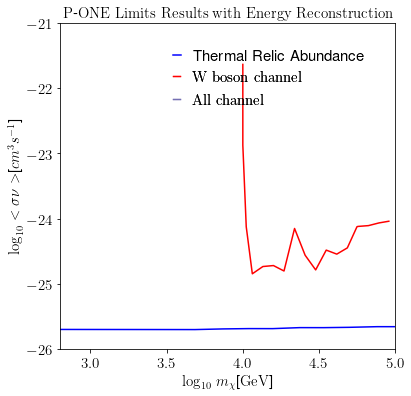

In [53]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']

ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    ax1.set_title(r'$\textrm{P}$-$\textrm{ONE Limits Results with Energy Reconstruction}$',fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    ax1.contour(pdm.results[i], levels = [0.9], colors=color_sm[j],  linestyles='-',
               origin='lower', extent=(min(np.log10(sv_grid)), max(np.log10(sv_grid)),
                                       min(np.log10(mass_grid)), max(np.log10(mass_grid))))
    
    # ax1.contour(limits_pone_unsm[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #              origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                      min(np.log10(sv_grid)), max(np.log10(sv_grid))))
# 
    # ax1.contour(limits_pone_45_25[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    #ax1.contour(limits_pone_35_15[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[1],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_25_10[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[2],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_15_009[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[3],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))

    #break
    #ax1.contour(limits_ice["numu"], levels=[0.9], colors='yellow',origin='lower',linestyles='-',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))#
    #ax1.contour(limits_pone_unsm["numu"], levels=[0.9], colors='green',origin='lower',linestyles='-.',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature P-ONE')
    
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label='Thermal Relic Abundance')
    #ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
    #         label='Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    ax1.set_xlim(2.8, max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), -21)  # 
    #ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)

    #ax1.text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)

    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.9),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    legend_elements = [Line2D([0], [0], color=color_sm[j], lw=1.3),
                   #Line2D([0], [0], linestyle='--', color=color_sm[j],  lw=1),
                   Line2D([0], [0], color=color_pone, lw=1.3)
                   #Line2D([0], [0], linestyle='-.', color=color_sm[j],  lw=1.3),
                   #Line2D([0], [0], linestyle=':',  color=color_sm[j], lw=1),
                   #Line2D([0], [0], color=color_sm[j], linestyle='dotted', lw=2),
                  ]
    labels = [r'$\textrm{W boson channel}$',
           #r'$\textrm{NFW}$, $\mu$ = [$0.35, 0.15$]',
           r'$\textrm{All channel}$',
           #r'0.15, 0.09'
           ]
    lgd2 = ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.765, +0.799),
                     ncol=1, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)
    # #h, _ = ax1.get_legend_handles_labels([legend_elements])
    #lgd2= ax1.legend(h, labels, loc=7, bbox_to_anchor=(1, 0.8),
    #                 ncol=1, fontsize=fontsize, handlelength=h_length,
    #                 fancybox=True, frameon=False)
    #ax1.add_artist(lgd2)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_all_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')
    break

Without Smearing

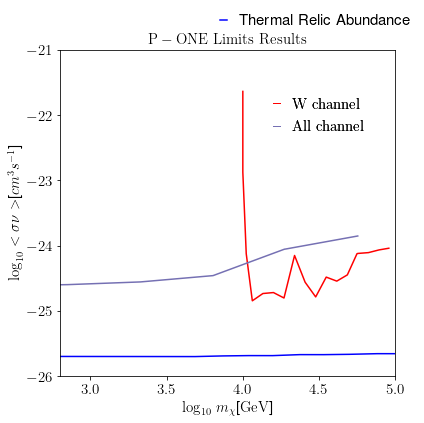

In [51]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']

ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    ax1.set_title(r'$\textrm{P}-\textrm{ONE Limits Results}$',fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    ax1.contour(pdm.results[i], levels = [0.9], colors=color_sm[j],  linestyles='-',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    ax1.contour(limits_pone_unsm[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
                 origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                         min(np.log10(sv_grid)), max(np.log10(sv_grid))))
# 
    # ax1.contour(limits_pone_45_25[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    #ax1.contour(limits_pone_35_15[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[1],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_25_10[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[2],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_15_009[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[3],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))

    #break
    #ax1.contour(limits_ice["numu"], levels=[0.9], colors='yellow',origin='lower',linestyles='-',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))#
    #ax1.contour(limits_pone_unsm["numu"], levels=[0.9], colors='green',origin='lower',linestyles='-.',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature P-ONE')
    
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label='Thermal Relic Abundance')
    #ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
    #         label='Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    ax1.set_xlim(2.8, max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), -21)  # 
    #ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)

    #ax1.text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)

    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.09, +1.09),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    legend_elements = [Line2D([0], [0], color=color_sm[j], lw=1),
                   #Line2D([0], [0], linestyle='--', color=color_sm[j],  lw=1),
                   Line2D([0], [0], color=color_pone, lw=1)
                   #Line2D([0], [0], linestyle='-.', color=color_sm[j],  lw=1.3),
                   #Line2D([0], [0], linestyle=':',  color=color_sm[j], lw=1),
                   #Line2D([0], [0], color=color_sm[j], linestyle='dotted', lw=2),
                  ]
    labels = [r'$\textrm{W channel}$',
           #r'$\textrm{NFW}$, $\mu$ = [$0.35, 0.15$]',
           r'$\textrm{All channel}$',
           #r'0.15, 0.09'
           ]
    lgd2 = ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.95, +0.799),
                     ncol=1, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)
    # #h, _ = ax1.get_legend_handles_labels([legend_elements])
    #lgd2= ax1.legend(h, labels, loc=7, bbox_to_anchor=(1, 0.8),
    #                 ncol=1, fontsize=fontsize, handlelength=h_length,
    #                 fancybox=True, frameon=False)
    #ax1.add_artist(lgd2)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_all_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')
    break